In [1]:
import pandas as pd
from config import config
import os
import numpy as np
model_fname = [
"deberta-base_lr1-640-5-2022",
"deberta-large_lr1-640-5-2022",

"deberta-v3-base_lr1-640-5-2022",
"deberta-v3-large_lr1-640-5-2022",
"deberta-v2-xlarge_lr1-640-5-2022",
]
selected = np.arange(len(model_fname))
model_fname

namespace(accumulate_grad_batches=None, bert='microsoft/deberta-large', bs=4, ck='/home/wangjingqi/input/ck/fpell', device_ids=[1], epochs=5, freeze=None, head_lr=0.0001, layer_start=-1, llrd=0.4, llrd_interval=1, log='/home/wangjingqi/fpell-pl/log', max_len=1024, model_fname='deberta-large_lr1-1024-5-2022', nfolds=5, patience=10, precision=16, prefix='lr1', reinit_layers=1, seed=2022, submit='/home/wangjingqi/input/dataset/fpell/sample_submission.csv', test='/home/wangjingqi/input/dataset/fpell/test.csv', train='/home/wangjingqi/input/dataset/fpell/train/train.csv', used_folds=[0, 1, 2, 3, 4], val_check_interval=1.0, wd=0)


['deberta-base_lr1-640-5-2022',
 'deberta-large_lr1-640-5-2022',
 'deberta-v3-base_lr1-640-5-2022',
 'deberta-v3-large_lr1-640-5-2022',
 'deberta-v2-xlarge_lr1-640-5-2022']

In [2]:
# from pycocotools.coco import COCO as pyCOCO
# stuff = pyCOCO("/home/wangjingqi/input/dataset/stuff/annotations/stuff_val2017.json")
# cap = pyCOCO("/home/wangjingqi/input/dataset/psg/annotations/captions_val2014.json")

In [3]:

def avg_log(model_fname):
    log_list =os.listdir(os.path.join(config.log,model_fname))
    log_list = [os.path.join(config.log,model_fname,l,"metrics.csv") for l in log_list if l.split("_")[-1]  in ["0"]]
    log_list = [pd.read_csv(l).dropna(axis=0,how='any').min() for l in log_list]
    avg_log = 0
    for log in log_list:
        avg_log +=log
    avg_log /= len(log_list)
    return avg_log
def log_list(model_fname):
    logs = [avg_log(log) for log in model_fname]
    logs = pd.concat(logs,axis=1)
    logs.columns=model_fname
    
    return logs

logs = log_list(model_fname)

In [5]:
logs

,deberta-base_lr1-640-5-2022,deberta-large_lr1-640-5-2022,deberta-v3-base_lr1-640-5-2022,deberta-v3-large_lr1-640-5-2022,deberta-v2-xlarge_lr1-640-5-2022
val_loss,0.098265,0.096122,0.097273,0.096323,0.097613
cohesion,0.464579,0.464428,0.469853,0.466985,0.473796
syntax,0.443243,0.442806,0.445146,0.443994,0.449242
vocabulary,0.413363,0.405348,0.413148,0.407258,0.406358
phraseology,0.430758,0.428186,0.433102,0.434194,0.438792
grammar,0.468158,0.457990,0.454139,0.454194,0.457661
conventions,0.447531,0.437518,0.437082,0.431435,0.428369
val_mcrmse,0.444680,0.439452,0.442078,0.439676,0.442472
epoch,0.000000,0.000000,0.000000,0.000000,0.000000
step,781.000000,781.000000,781.000000,781.000000,781.000000


In [6]:

# selected = ["bl-1","-1","blld-1","ld-1","ld1-1","ld1crop6-1","ld1bf-1"]
# model_fname = []
# model_fname += [f"deberta_{p}-{640}-{2022}" for p in selected]
# model_fname

In [7]:
def plot_log(model_fname,fold):
    name_list = []
    for mf in model_fname:
        ll =os.listdir(os.path.join(config.log,mf))
        for i in ll:
            if i.split("_")[-1] == f"{fold}":
                name_list.append(i)
    log_list = [os.path.join(config.log,l[:-2],l,"metrics.csv") for l in name_list ]
    log_list = [pd.read_csv(l).dropna(axis=0,how='any')["val_mcrmse"] for l in log_list]
    log_list = pd.concat(log_list,axis=1)
    log_list.columns=name_list
    log_list.plot()
    

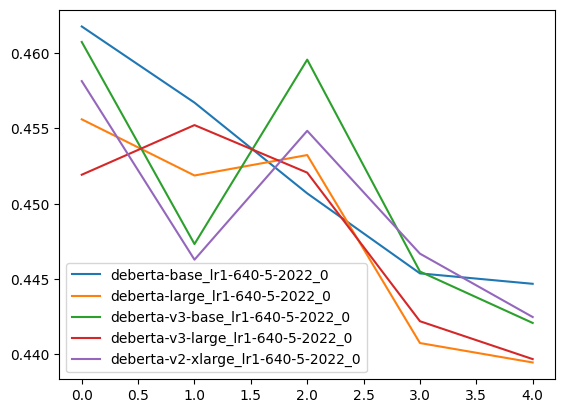

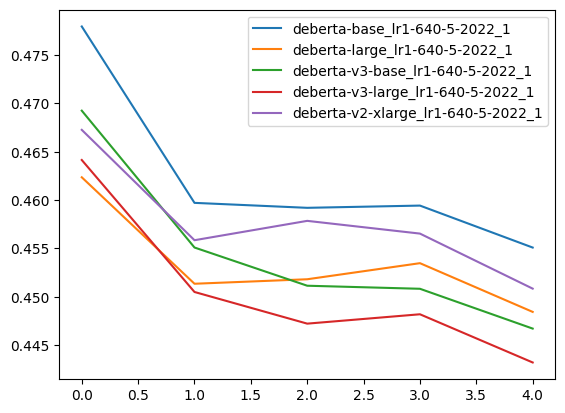

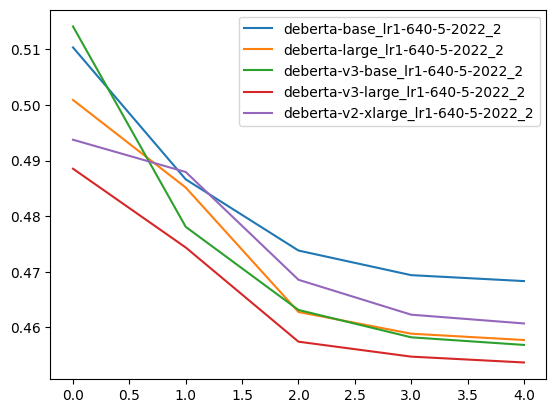

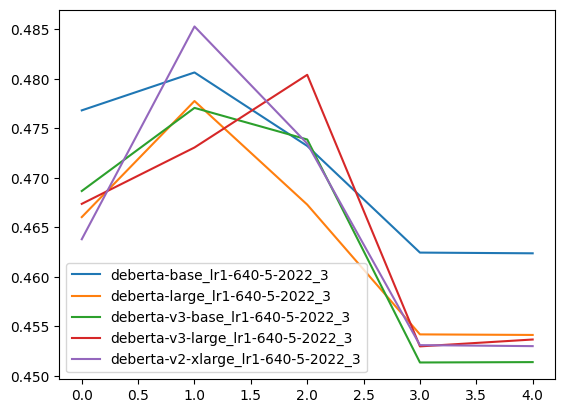

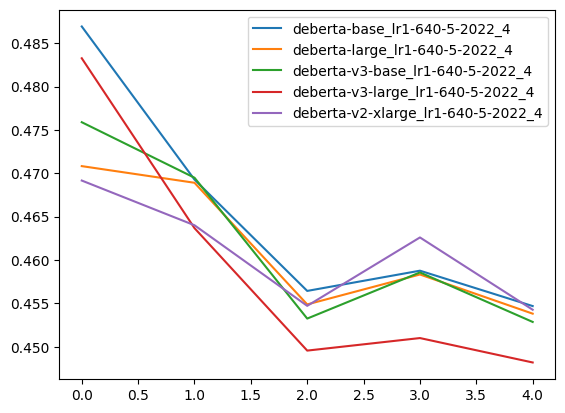

In [8]:
for i in range(5):
    try:
        plot_log(model_fname,i)
    except:
        pass